In [1]:
import pandas as pd

kegg_pathways = pd.read_csv("kegg_pathways_v1.csv")

kegg_pathways

,Pathway,Pathway Name,Metabolite,SMILES
0,map00010,Glycolysis / Gluconeogenesis,C00022,CC(=O)C(=O)O
1,map00010,Glycolysis / Gluconeogenesis,C00024,CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...
2,map00010,Glycolysis / Gluconeogenesis,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
3,map00010,Glycolysis / Gluconeogenesis,C00033,CC(=O)O
4,map00010,Glycolysis / Gluconeogenesis,C00036,O=C(O)CC(=O)C(=O)O
...,...,...,...,...
2009,map01070,Biosynthesis of plant hormones,C08814,CC(C)[C@H](C)[C@@H](O)[C@H](O)[C@@H](C)[C@H]1C...
2010,map01070,Biosynthesis of plant hormones,C09190,CC1=C[C@H](O/C=C2/C(=O)O[C@@H]3C4=C(C[C@H]23)[...
2011,map01070,Biosynthesis of plant hormones,C11434,C[C@](O)(CO)[C@H](O)COP(=O)(O)O
2012,map01070,Biosynthesis of plant hormones,C11437,CC(=O)[C@@H](O)[C@H](O)COP(=O)(O)O


In [2]:
kegg_pathways["Pathway Name"].unique()[[0, 1, 2, 4, 5, 7, 8]]

array(['Glycolysis / Gluconeogenesis', 'Citrate cycle (TCA cycle)',
       'Pentose phosphate pathway', 'Arginine biosynthesis',
       'Purine metabolism', 'Starch and sucrose metabolism',
       'Amino sugar and nucleotide sugar metabolism'], dtype=object)

In [3]:
kegg_pathways["Pathway Name"].unique()

pathways_to_delete = [0, 1, 2, 4, 5, 7, 8]
pathways_to_delete = kegg_pathways["Pathway Name"].unique()[pathways_to_delete]

kegg_pathways = kegg_pathways[~kegg_pathways["Pathway Name"].isin(pathways_to_delete)]


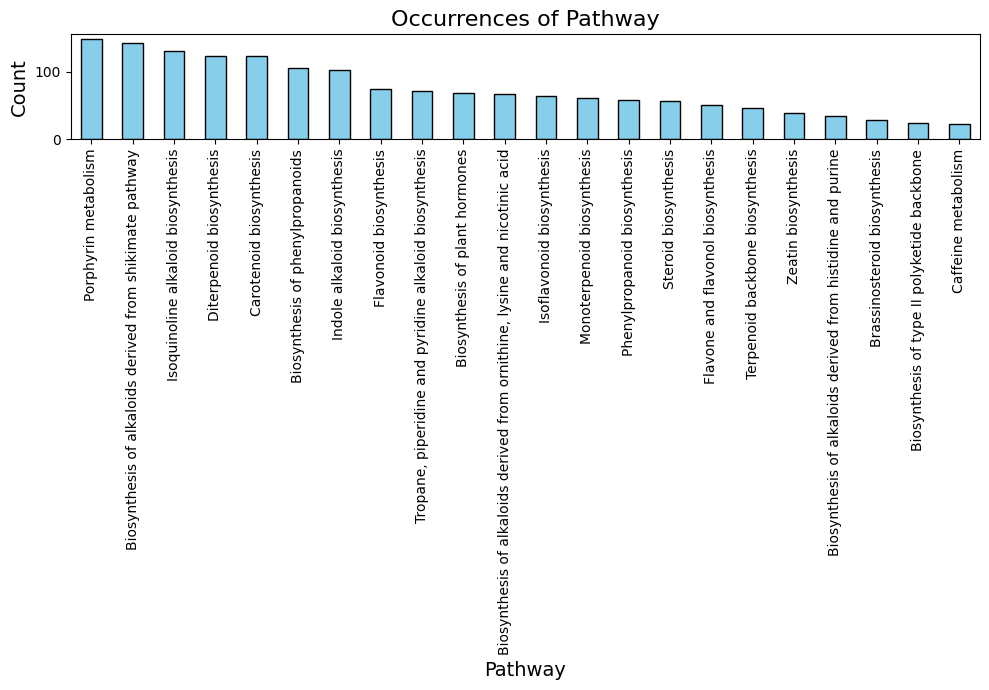

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = kegg_pathways["Pathway Name"].value_counts()

# Plot the results
plt.figure(figsize=(10, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Pathway", fontsize=16)
plt.xlabel("Pathway", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

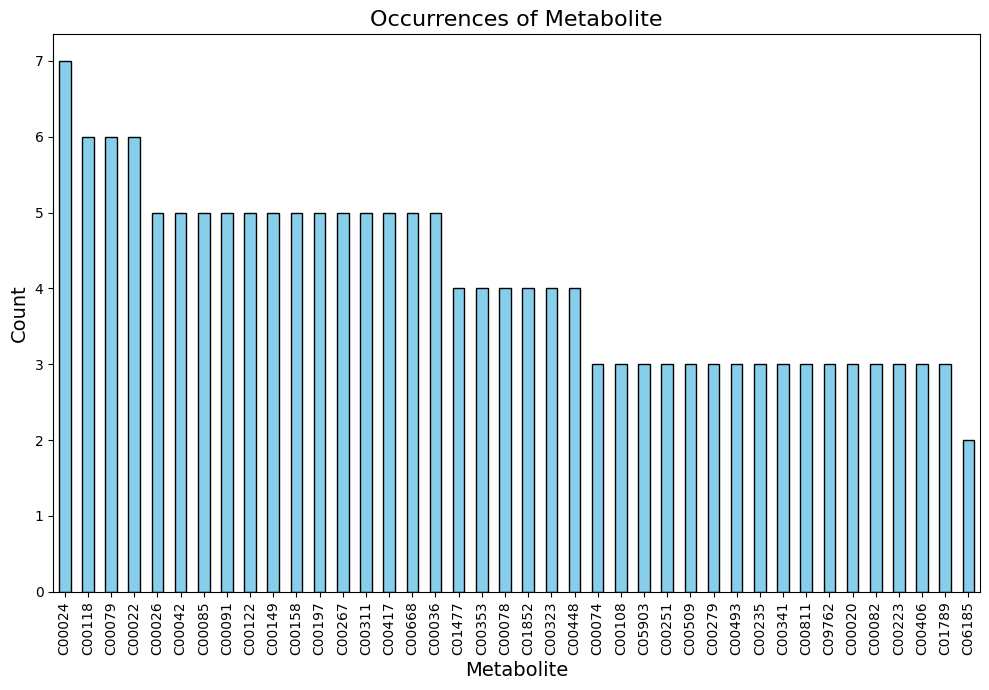

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = kegg_pathways["Metabolite"].value_counts()[:40]

# Plot the results
plt.figure(figsize=(10, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Metabolite", fontsize=16)
plt.xlabel("Metabolite", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
to_delete = kegg_pathways["Metabolite"].value_counts()[:39].index.to_list()
kegg_pathways = kegg_pathways[~kegg_pathways["Metabolite"].isin(to_delete)]
to_delete = ["C00002", "C00008"]
kegg_pathways = kegg_pathways[~kegg_pathways["Metabolite"].isin(to_delete)]

In [7]:
kegg_pathways = kegg_pathways.groupby(["Metabolite", "SMILES"], as_index=True).agg({"Pathway Name": list, "Pathway": list})

In [8]:
kegg_pathways["Pathway"].apply(len).describe()

count    1271.000000
mean        1.153423
std         0.360536
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Pathway, dtype: float64

In [9]:
# Flatten the MultiIndex
kegg_pathways = kegg_pathways.reset_index()

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
label_array = mlb.fit_transform(kegg_pathways["Pathway Name"])

In [11]:
kegg_pathways = pd.concat((kegg_pathways, pd.DataFrame(label_array, columns=mlb.classes_)), axis=1)
kegg_pathways

,Metabolite,SMILES,Pathway Name,Pathway,Biosynthesis of alkaloids derived from histidine and purine,"Biosynthesis of alkaloids derived from ornithine, lysine and nicotinic acid",Biosynthesis of alkaloids derived from shikimate pathway,Biosynthesis of phenylpropanoids,Biosynthesis of plant hormones,Biosynthesis of type II polyketide backbone,...,Indole alkaloid biosynthesis,Isoflavonoid biosynthesis,Isoquinoline alkaloid biosynthesis,Monoterpenoid biosynthesis,Phenylpropanoid biosynthesis,Porphyrin metabolism,Steroid biosynthesis,Terpenoid backbone biosynthesis,"Tropane, piperidine and pyridine alkaloid biosynthesis",Zeatin biosynthesis
0,C00015,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C00019,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,"[Zeatin biosynthesis, Biosynthesis of plant ho...","[map00908, map01070]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,C00025,N[C@@H](CCC(=O)O)C(=O)O,"[Porphyrin metabolism, Biosynthesis of alkaloi...","[map00860, map01064]",0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,C00029,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O[C@H...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,C22945,CC[C@@H]1[C@@H](O)[N+]2(C)C3C[C@H]1C1[C@@H](O)...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1267,C22950,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1268,C22951,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1269,C22960,C=C(C(=O)OC)c1[nH]c2ccccc2c1CCN1C=C(CC)C=CC1,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
from rdkit import Chem

# Define the function to check hydrogen count
def has_more_non_hydrogens_than_threshold(smiles, threshold):
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        raise ValueError("Invalid SMILES string")
     # Add hydrogens to the molecule
    non_hydrogen_count = sum(atom.GetSymbol() != 'H' for atom in molecule.GetAtoms())
    return non_hydrogen_count >= threshold


# Define the hydrogen threshold
threshold = 7

# Apply the function and filter the DataFrame
kegg_pathways['HasEnoughNonHydrogens'] = kegg_pathways['SMILES'].apply(lambda x: has_more_non_hydrogens_than_threshold(x, threshold))
kegg_pathways = kegg_pathways[kegg_pathways['HasEnoughNonHydrogens']]

# Drop the helper column
kegg_pathways = kegg_pathways.drop(columns=['HasEnoughNonHydrogens'])
kegg_pathways

,Metabolite,SMILES,Pathway Name,Pathway,Biosynthesis of alkaloids derived from histidine and purine,"Biosynthesis of alkaloids derived from ornithine, lysine and nicotinic acid",Biosynthesis of alkaloids derived from shikimate pathway,Biosynthesis of phenylpropanoids,Biosynthesis of plant hormones,Biosynthesis of type II polyketide backbone,...,Indole alkaloid biosynthesis,Isoflavonoid biosynthesis,Isoquinoline alkaloid biosynthesis,Monoterpenoid biosynthesis,Phenylpropanoid biosynthesis,Porphyrin metabolism,Steroid biosynthesis,Terpenoid backbone biosynthesis,"Tropane, piperidine and pyridine alkaloid biosynthesis",Zeatin biosynthesis
0,C00015,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C00019,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,"[Zeatin biosynthesis, Biosynthesis of plant ho...","[map00908, map01070]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,C00025,N[C@@H](CCC(=O)O)C(=O)O,"[Porphyrin metabolism, Biosynthesis of alkaloi...","[map00860, map01064]",0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,C00029,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O[C@H...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,C22945,CC[C@@H]1[C@@H](O)[N+]2(C)C3C[C@H]1C1[C@@H](O)...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1267,C22950,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1268,C22951,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1269,C22960,C=C(C(=O)OC)c1[nH]c2ccccc2c1CCN1C=C(CC)C=CC1,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
kegg_pathways.to_csv("kegg_pathways_w_labels.csv", index=False)

In [14]:
kegg_pathways["Pathway Name"].value_counts()

Pathway Name
[Porphyrin metabolism]                                                                                                                   132
[Diterpenoid biosynthesis]                                                                                                               119
[Carotenoid biosynthesis]                                                                                                                114
[Indole alkaloid biosynthesis]                                                                                                            81
[Isoquinoline alkaloid biosynthesis]                                                                                                      77
[Monoterpenoid biosynthesis]                                                                                                              59
[Steroid biosynthesis]                                                                                                                    51


/tmp/ipykernel_1843965/789638790.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


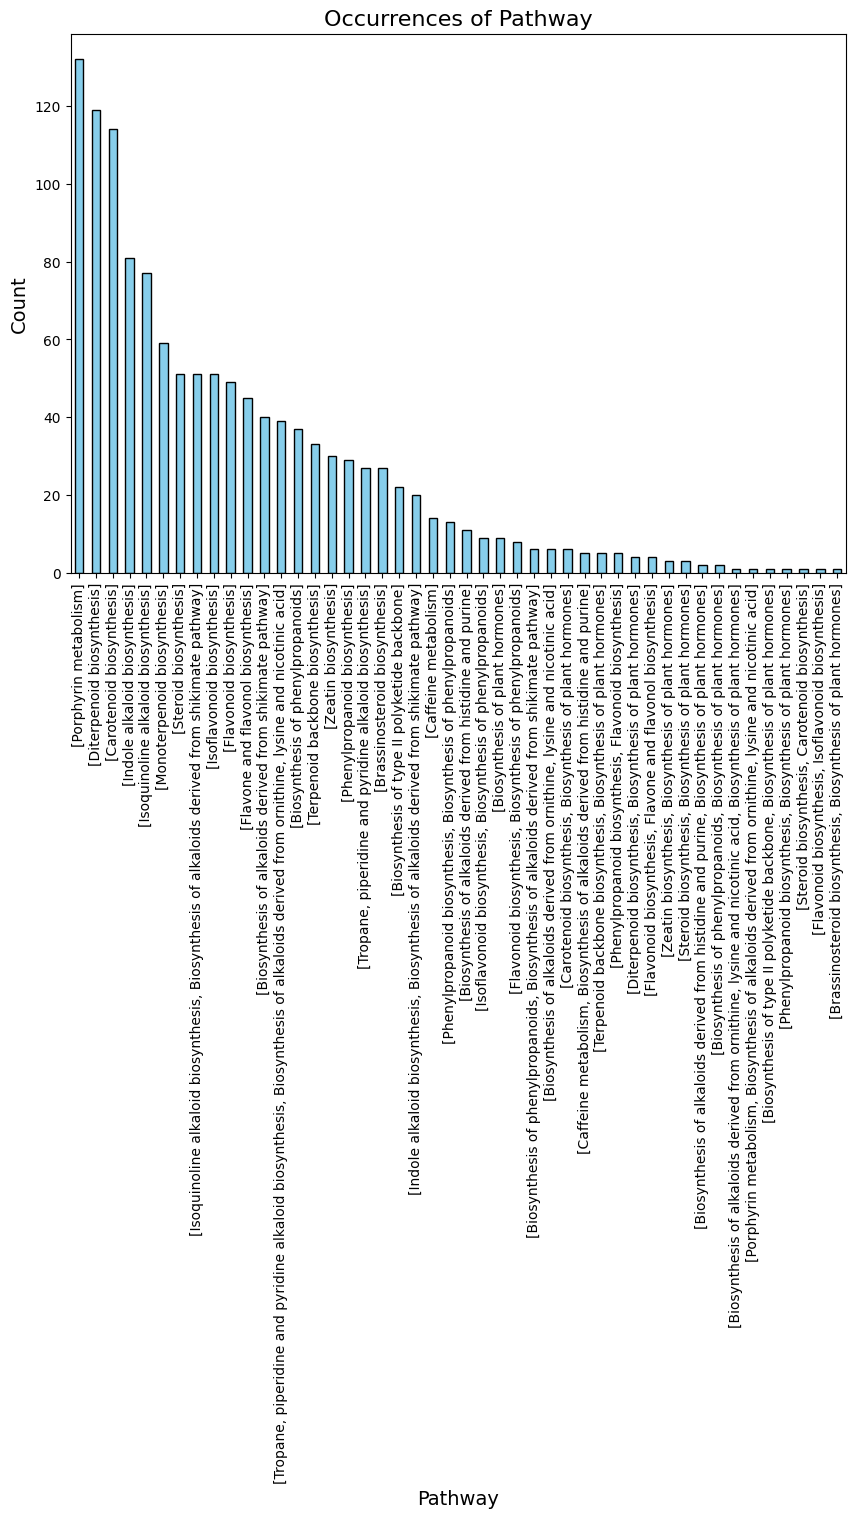

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = kegg_pathways["Pathway Name"].value_counts()

# Plot the results
plt.figure(figsize=(10, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Pathway", fontsize=16)
plt.xlabel("Pathway", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.tight_layout()
plt.show()